# Task 1: Laying the Foundation for Analysis

## Brent Oil Change Point Analysis Project

**Objective**: Define the data analysis workflow and understand the model and data for Brent oil price change point analysis.

**Team**: Birhan Energies Data Science Team  
**Date**: August 2025

## 1. Project Setup and Imports

In [1]:
# Import necessary libraries
import sys
import os

# Add project root to path
project_root = os.path.abspath('..')
sys.path.append(project_root)

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Custom utilities
from utils.data_loader import load_brent_data, get_data_summary, check_data_quality
from utils.time_series_analysis import (
    analyze_stationarity, detect_trend, analyze_volatility, 
    seasonal_analysis, plot_time_series_properties
)
from utils.event_data import (
    create_major_events_dataset, save_events_to_csv, 
    get_events_in_period, create_event_impact_windows
)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully")
print(f"📁 Project root: {project_root}")

✅ All libraries imported successfully
📁 Project root: c:\Users\senta\OneDrive\Documents\Proj\10 Ac\brent-oil-change-point-analysis


## 2. Data Analysis Workflow Definition

### 2.1 Comprehensive Analysis Workflow

Our analysis will follow a structured approach to achieve the business objectives:

### **Phase 1: Data Foundation & Understanding**
1. **Data Loading & Quality Assessment**
   - Load Brent oil price data
   - Assess data quality, completeness, and consistency
   - Handle missing values and outliers

2. **Exploratory Data Analysis**
   - Analyze time series properties (trend, seasonality, stationarity)
   - Examine price volatility patterns
   - Identify preliminary patterns and anomalies

3. **Event Data Integration**
   - Compile major geopolitical and economic events
   - Create structured event dataset with impact windows
   - Align event timeline with price data

### **Phase 2: Statistical Modeling**
4. **Bayesian Change Point Model Development**
   - Implement PyMC3 change point detection model
   - Define prior distributions for parameters
   - Configure MCMC sampling strategy

5. **Model Fitting & Validation**
   - Fit model to historical data
   - Assess model convergence and diagnostics
   - Validate model assumptions

6. **Change Point Detection & Analysis**
   - Identify statistically significant change points
   - Quantify uncertainty in change point locations
   - Analyze parameter changes at each point

### **Phase 3: Business Intelligence & Insights**
7. **Event-Change Point Association**
   - Match detected change points with known events
   - Quantify event impact magnitude and duration
   - Identify unexplained change points for further investigation

8. **Impact Quantification & Analysis**
   - Measure price impact of different event categories
   - Analyze recovery patterns post-events
   - Compare expected vs. actual market responses

9. **Strategic Insights & Recommendations**
   - Develop investment strategy implications
   - Provide policy recommendations
   - Create operational planning guidance

### **Phase 4: Communication & Delivery**
10. **Interactive Dashboard Development**
    - Build Streamlit/Dash dashboard for stakeholders
    - Implement interactive visualizations
    - Enable scenario analysis capabilities

11. **Report & Documentation**
    - Comprehensive technical report
    - Executive summary for decision-makers
    - Methodology documentation

### 2.2 Key Assumptions and Limitations

#### **Assumptions**
1. **Market Efficiency**: Price changes reflect available information with some delay
2. **Event Impact**: Major geopolitical events have measurable impact on oil prices
3. **Change Point Model**: Brent oil prices follow a piecewise constant mean model with occasional structural breaks
4. **Data Quality**: Historical price data is accurate and representative
5. **Event Classification**: Selected events represent the most significant market drivers

#### **Limitations**
1. **Correlation vs. Causation**: 
   - **Critical Distinction**: Statistical correlation between events and price changes does NOT prove causation
   - **Confounding Factors**: Multiple events may occur simultaneously, making attribution difficult
   - **Market Complexity**: Oil prices are influenced by numerous factors beyond our event dataset
   - **Temporal Alignment**: Event timing may not perfectly align with market reaction timing

2. **Model Limitations**:
   - Change point models assume discrete breaks rather than gradual transitions
   - Model may miss subtle or gradual changes
   - Prior distribution choices can influence results

3. **Data Limitations**:
   - Historical data may not predict future patterns
   - Market structure changes over time
   - Event impact may vary based on market conditions

4. **Selection Bias**:
   - Event selection based on known historical significance
   - May miss unexpected or lesser-known influential events
   - Hindsight bias in event categorization

### 2.3 Communication Strategy

#### **Target Stakeholders & Communication Channels**

1. **Investors & Fund Managers**
   - **Medium**: Interactive dashboard, executive briefings
   - **Format**: Visual analytics, risk metrics, scenario analysis
   - **Focus**: ROI implications, risk assessment, timing strategies

2. **Policymakers & Government Bodies**
   - **Medium**: Formal reports, policy briefs, presentations
   - **Format**: Statistical evidence, policy recommendations, economic impact analysis
   - **Focus**: Economic stability, energy security, regulatory implications

3. **Energy Companies**
   - **Medium**: Technical reports, operational dashboards
   - **Format**: Operational metrics, supply chain insights, cost analysis
   - **Focus**: Operational planning, cost management, supply security

4. **Academic & Research Community**
   - **Medium**: Technical documentation, methodology papers
   - **Format**: Statistical analysis, model validation, reproducible research
   - **Focus**: Methodological rigor, model innovation, peer review

## 3. Data Loading and Initial Assessment

In [10]:
# Load Brent oil price data
data_path = '../data/BrentOilPrices.csv'  # Adjust path as needed

try:
    brent_data = load_brent_data(data_path)
    print("✅ Brent oil data loaded successfully")
    print(f"📊 Data shape: {brent_data.shape}")
    print(f"📅 Date range: {brent_data.index.min()} to {brent_data.index.max()}")
except Exception as e:
    print(f"❌ Error loading data: {e}")
    print("Please ensure the Brent oil data file is in the correct location")

Data loaded successfully: 9011 records from 1987-05-20 00:00:00 to 2020-04-21 00:00:00
✅ Brent oil data loaded successfully
📊 Data shape: (9011, 1)
📅 Date range: 1987-05-20 00:00:00 to 2020-04-21 00:00:00


In [11]:
# Display first few rows
if 'brent_data' in locals():
    print("📋 First 10 rows of data:")
    display(brent_data.head(10))
    
    print("\n📋 Last 10 rows of data:")
    display(brent_data.tail(10))

📋 First 10 rows of data:


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
1987-05-27,18.60
1987-05-28,18.60
1987-05-29,18.58
1987-06-01,18.65



📋 Last 10 rows of data:


,Price
Date,
NaT,95.12
NaT,96.07
NaT,95.29
NaT,99.53
NaT,99.87
NaT,96.85
NaT,93.05
NaT,94.25
NaT,96.37


In [12]:
# Get comprehensive data summary
if 'brent_data' in locals():
    data_summary = get_data_summary(brent_data)
    
    print("📊 DATA SUMMARY")
    print("=" * 50)
    print(f"Total Records: {data_summary['total_records']:,}")
    print(f"Date Range: {data_summary['date_range'][0]} to {data_summary['date_range'][1]}")
    print(f"Data Frequency: {data_summary['data_frequency']}")
    print(f"Missing Values: {data_summary['missing_values']}")
    
    print("\n💰 PRICE STATISTICS")
    print("=" * 50)
    for stat, value in data_summary['price_stats'].items():
        print(f"{stat.title()}: ${value:.2f}")

📊 DATA SUMMARY
Total Records: 9,011
Date Range: 1987-05-20 00:00:00 to 2020-04-21 00:00:00
Data Frequency: None
Missing Values: 0

💰 PRICE STATISTICS
Count: $9011.00
Mean: $48.42
Std: $32.86
Min: $9.10
25%: $19.05
50%: $38.57
75%: $70.09
Max: $143.95


In [13]:
# Perform data quality assessment
if 'brent_data' in locals():
    quality_report = check_data_quality(brent_data)
    
    print("🔍 DATA QUALITY ASSESSMENT")
    print("=" * 50)
    print(f"Missing Dates: {quality_report['missing_dates']}")
    print(f"Missing Prices: {quality_report['missing_prices']}")
    print(f"Zero Prices: {quality_report['zero_prices']}")
    print(f"Negative Prices: {quality_report['negative_prices']}")
    print(f"Outliers (IQR method): {quality_report['outliers_iqr']}")
    print(f"Significant Data Gaps (>7 days): {quality_report['data_gaps']}")
    
    if quality_report['missing_prices'] == 0 and quality_report['negative_prices'] == 0:
        print("\n✅ Data quality looks good!")
    else:
        print("\n⚠️ Data quality issues detected - review required")

🔍 DATA QUALITY ASSESSMENT
Missing Dates: 650
Missing Prices: 0
Zero Prices: 0
Negative Prices: 0
Outliers (IQR method): 0
Significant Data Gaps (>7 days): 0

✅ Data quality looks good!


## 4. Time Series Properties Analysis

Before implementing change point models, we need to understand the fundamental properties of our time series data.

In [14]:
# Analyze stationarity
if 'brent_data' in locals():
    stationarity_results = analyze_stationarity(brent_data['Price'])
    
    print("📈 STATIONARITY ANALYSIS")
    print("=" * 50)
    
    print("\n🔬 Augmented Dickey-Fuller Test:")
    adf = stationarity_results['adf_test']
    print(f"  Statistic: {adf['statistic']:.4f}")
    print(f"  P-value: {adf['p_value']:.4f}")
    print(f"  Is Stationary: {adf['is_stationary']}")
    
    print("\n🔬 KPSS Test:")
    kpss = stationarity_results['kpss_test']
    print(f"  Statistic: {kpss['statistic']:.4f}")
    print(f"  P-value: {kpss['p_value']:.4f}")
    print(f"  Is Stationary: {kpss['is_stationary']}")
    
    print(f"\n📊 Overall Conclusion: {stationarity_results['conclusion']}")
    
    # Implications for modeling
    if stationarity_results['conclusion'] == 'Non-stationary':
        print("\n💡 MODELING IMPLICATIONS:")
        print("   - Non-stationary data suggests presence of trends or structural breaks")
        print("   - Change point models are well-suited for this type of data")
        print("   - May need to consider differencing or detrending for some analyses")

📈 STATIONARITY ANALYSIS

🔬 Augmented Dickey-Fuller Test:
  Statistic: -1.9939
  P-value: 0.2893
  Is Stationary: False

🔬 KPSS Test:
  Statistic: 9.5588
  P-value: 0.0100
  Is Stationary: False

📊 Overall Conclusion: Non-stationary

💡 MODELING IMPLICATIONS:
   - Non-stationary data suggests presence of trends or structural breaks
   - Change point models are well-suited for this type of data
   - May need to consider differencing or detrending for some analyses


c:\Users\senta\OneDrive\Documents\Proj\10 Ac\brent-oil-change-point-analysis\utils\time_series_analysis.py:38: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(clean_series, regression='c', nlags='auto')


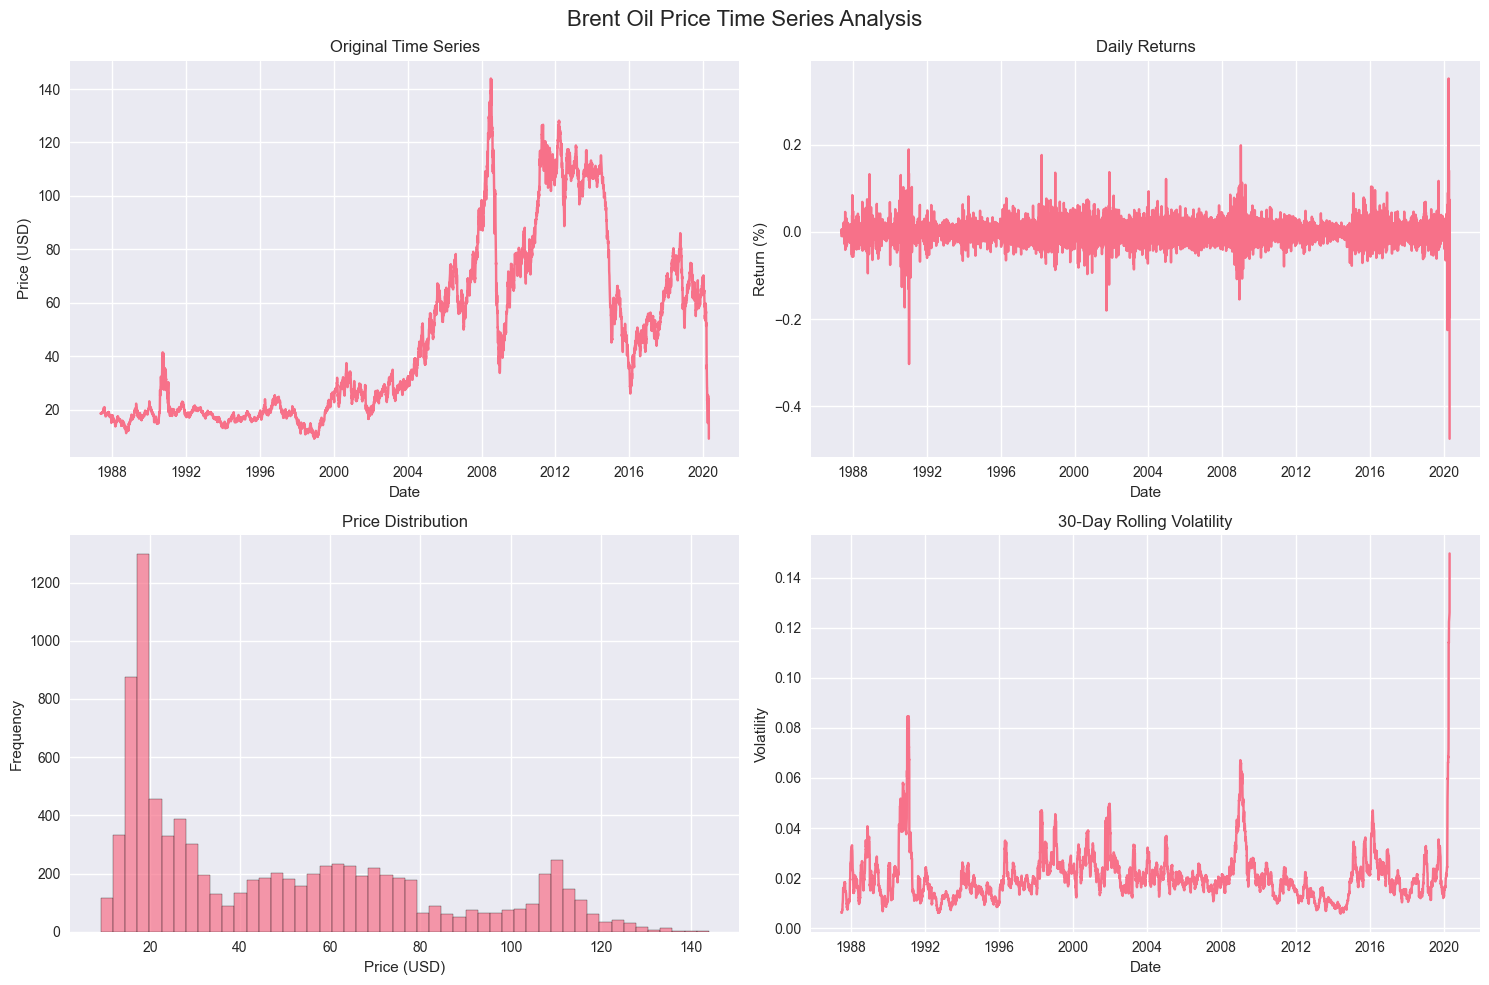

In [15]:
# Create comprehensive time series plots
if 'brent_data' in locals():
    plot_time_series_properties(brent_data['Price'], 
                               title="Brent Oil Price Time Series Analysis")

## 5. Major Events Dataset

Research and compile major geopolitical and economic events that potentially impacted Brent oil prices.

In [16]:
# Create and save major events dataset
events_df = create_major_events_dataset()

# Save to CSV
events_path = '../data/major_events.csv'
save_events_to_csv(events_df, events_path)

print(f"📅 Created dataset with {len(events_df)} major events")
print(f"📁 Saved to: {events_path}")

Events data saved to ../data/major_events.csv
📅 Created dataset with 15 major events
📁 Saved to: ../data/major_events.csv


In [17]:
# Display events dataset
print("📋 MAJOR EVENTS DATASET")
print("=" * 80)
display(events_df[['date', 'event_name', 'category', 'expected_impact', 'region']])

📋 MAJOR EVENTS DATASET


,date,event_name,category,expected_impact,region
0,1990-08-02,Iraq Invasion of Kuwait,Geopolitical Conflict,Price Increase,Middle East
1,1997-07-02,Asian Financial Crisis,Economic Crisis,Price Decrease,Asia
2,2001-09-11,9/11 Terrorist Attacks,Geopolitical Event,Price Volatility,North America
3,2003-03-20,Iraq War Begins,Geopolitical Conflict,Price Increase,Middle East
4,2008-09-15,Lehman Brothers Collapse,Economic Crisis,Price Decrease,Global
5,2010-12-17,Arab Spring Begins,Geopolitical Unrest,Price Increase,Middle East/North Africa
6,2011-03-11,Fukushima Nuclear Disaster,Natural/Industrial Disaster,Price Increase,Asia
7,2014-11-27,OPEC Maintains Production,OPEC Policy,Price Decrease,Global
8,2016-11-30,OPEC Production Cut Agreement,OPEC Policy,Price Increase,Global
9,2018-05-08,US Withdraws from Iran Nuclear Deal,Sanctions/Trade,Price Increase,Middle East


## 6. Understanding Change Point Models

### Purpose and Expected Outputs

**Change point models** identify points in time where statistical properties of a time series change abruptly. For oil price analysis:

#### **Key Purposes:**
- **Structural Break Detection**: Identify when oil price behavior fundamentally changes
- **Regime Identification**: Discover different market regimes with distinct characteristics
- **Event Impact Quantification**: Measure how external events alter price dynamics

#### **Expected Outputs:**
1. **Change Point Locations (τ)**: Specific dates when structural breaks occur
2. **Parameter Values by Regime**: Mean levels, volatility, and trends in each period
3. **Regime Probabilities**: Confidence in regime assignments
4. **Model Diagnostics**: Convergence and fit quality metrics

#### **Model Limitations:**
- Assumes discrete breaks rather than gradual transitions
- May miss subtle changes
- Prior distribution choices influence results
- **Correlation ≠ Causation**: Statistical association doesn't prove causal impact